𝐋𝐞𝐭𝐬𝐆𝐫𝐨𝐰𝐌𝐨𝐫𝐞 (𝐋𝐆𝐌𝐕𝐈𝐏) - "𝐃𝐀𝐓𝐀 𝐒𝐂𝐈𝐄𝐍𝐂𝐄 𝐈𝐍𝐓𝐄𝐑𝐍"
LGMVIP APRIL-22
AUTHOR - YEDE ABHISHEK KAILAS
Advanced Level Task
TASK - 7 : Develop a Neural Network That Can Read Handwriting
Dataset link :https://en.wikipedia.org/wiki/MNIST_database


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 18s 2us/step


In [4]:
X_train.shape

(60000, 28, 28)

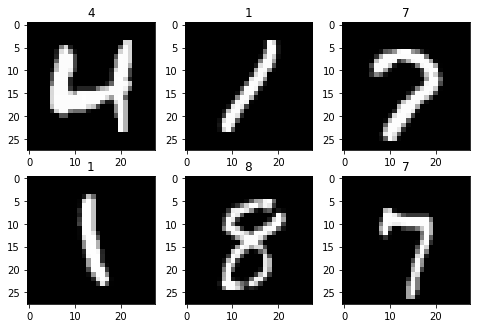

In [15]:
plt.figure(figsize=(8, 8))
np.random.seed(0)
idx = np.random.randint(0, 60000, 6)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [17]:
print("Class label of first image :", y_train[0])
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
model = None
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 63s 133ms/step - loss: 0.2330 - accuracy: 0.9314
Epoch 2/20
469/469 [==============================] - 63s 134ms/step - loss: 0.0872 - accuracy: 0.9745
Epoch 3/20
469/469 [==============================] - 65s 139ms/step - loss: 0.0660 - accuracy: 0.9797
Epoch 4/20
469/469 [==============================] - 65s 139ms/step - loss: 0.0543 - accuracy: 0.9833
Epoch 5/20
469/469 [==============================] - 64s 137ms/step - loss: 0.0450 - accuracy: 0.9863
Epoch 6/20
469/469 [==============================] - 61s 131ms/step - loss: 0.0396 - accuracy: 0.9878
Epoch 7/20
469/469 [==============================] - 62s 132ms/step - loss: 0.0348 - accuracy: 0.9887
Epoch 8/20
469/469 [==============================] - 59s 126ms/step - loss: 0.0293 - accuracy: 0.9905
Epoch 9/20
469/469 [==============================] - 60s 128ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 10/20
469/469 [==============================] - 61s 131ms/step - l

In [19]:
prediction_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.035540621727705, 0.9921000003814697]


In [20]:
from keras.preprocessing import image

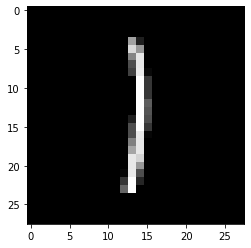

In [22]:
plt.imshow(image.array_to_img(X_test[40]), cmap="gray")

In [23]:
y_test[40]

1

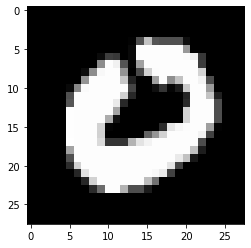

In [33]:
plt.imshow(image.array_to_img(X_test[25]), cmap="gray")

In [34]:
y_test[25]

0

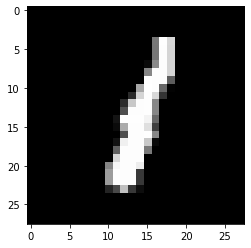

In [32]:
plt.imshow(image.array_to_img(X_test[89]), cmap="gray")



In [29]:
y_test[79]

7

Predicted Value:  9
Successful prediction


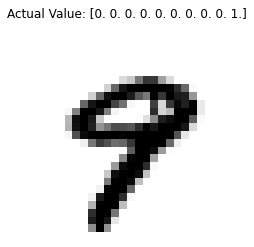

In [30]:
plt.imshow(X_test[9],cmap='gray_r')
plt.title('Actual Value: {}'.format(Y_test[9]))
prediction=model.predict(X_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[9]))
if(y_test[9]==(np.argmax(prediction[9]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')